# Importing Libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importing all the relevant libraries needed.
import pandas as pd
import sklearn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN

# Importing datasets

In [5]:
# Reading the csv file "x_train_all.csv"
df = pd.read_csv("x_train_all.csv")

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [7]:
# Reading the csv file "y_train_all.csv"
train_y_df = pd.read_csv("y_train_all.csv")

In [8]:
# Reading the csv file "y_train_all.csv"
test_x_df = pd.read_csv("x_test_all.csv")

In [9]:
# Reading the csv file "y_train_all.csv"
test_y_df = pd.read_csv("y_test_all.csv")

In [10]:
train_y_df['0'].value_counts()

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: count, dtype: int64

# Data Visulaization and Exploration

In [11]:
# Retrieving the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [12]:
# Retrieving the information on the shape of the data.
df.shape

(9690, 2304)

In [13]:
# Printing the first five rows of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


### Pixel Intensity Histogram

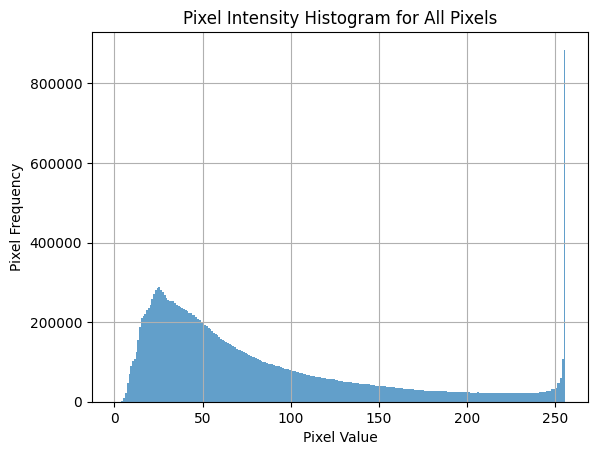

In [14]:
# Flattens the dataframe df into a 1 dimensional array to plot the histogram.
reshaped_df = df.values.ravel()
# Creates the histogram to view the pixel intensity.
plt.hist(reshaped_df, bins=256, range=(0, 256), alpha=0.7)
# Labels the x - axis as Pixel Value.
plt.xlabel('Pixel Value')
# Labels the y - axis as Pixel Frequency.
plt.ylabel('Pixel Frequency')
# Labels the title as Pixel Intensity Histogram for All Pixels.
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the grid lines on the histogram.
plt.grid(True)
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the histogram.
plt.show()

### Visualizing the image

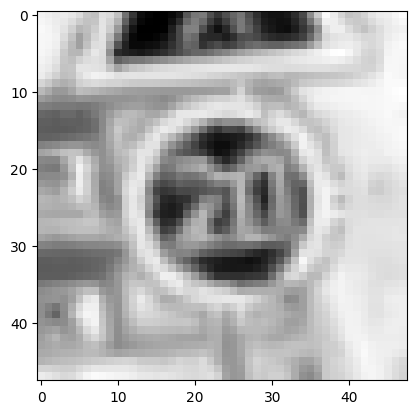

In [15]:
# Storing the images in visualize_img.
visualize_img = df.values

# Viewing the image.
some_digit = visualize_img[2]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

# Image Enhancement Technique

### Histogram Equalization

In [16]:
# Reshapes the dataframe df into 3D array in the shape 48x48 grid to represent
# in form of image.
def hist_eq(df):
    reshaped_df = df.values.reshape(-1, 48, 48)

    # Initializing the list to store images after applying equalization.
    equalized_df = []

    # Iterating through all the images to apply histogram equalisation.
    for image in reshaped_df:
        # Checking if the image is in the greyscale format and is 8-bit.
        if image.dtype != np.uint8:
            # Converting the image to 8 - bit otherwise.
            image = cv2.convertScaleAbs(image)  # Convert to 8-bit image if needed.

        # Applying histogram equalisation to the image to enchance the contrast.
        equalized_img = cv2.equalizeHist(image)

        # Adding the enchanced image to the equalized_df.
        equalized_df.append(equalized_img)

    # Converting the list into NumPy array.
    equalized_df = np.array(equalized_df)
    return equalized_df


In [17]:
# applying histogram equalization on complete train dataset
equalized_df_train = hist_eq(df)

In [18]:
# applying histogram equalization on test dataset
equalized_df_test = hist_eq(test_x_df)

In [19]:
def convert_array_df(equalized_df):  
    # Storing the no. of images and dimensions of equalized_df.
    n_img, height, width = equalized_df.shape

    # Reshaping the array into two - dimensional array.
    equalized_ndf = equalized_df.reshape(n_img, -1)

    # Converting the array equalized_ndf into a dataframe.
    ndf = pd.DataFrame(equalized_ndf)
    return ndf

In [20]:
#converting train data array into dataframe
ndf_train = convert_array_df(equalized_df_train)

In [21]:
#converting test data array into dataframe
ndf_test = convert_array_df(equalized_df_test)

### Gamma Correction

In [22]:
def gamma_correction(ndf):
    # Setting the gamma value for gamma correction.
    gamma = 0.62
    # Applying gamma correction on the dataframe ndf.
    gamma_corrected_ndf = ndf.apply(lambda x: 255 * (x / 255) ** (1 / gamma))
    return gamma_corrected_ndf

In [23]:
#applying gamma correction on train data 
gamma_corrected_ndf_train = gamma_correction(ndf_train)

In [24]:
#applying gamma correction on test data 
gamma_corrected_ndf_test = gamma_correction(ndf_test)

# Data Preprocessing

### Normalizing the dataset

In [25]:
def normalization(gamma_corrected_ndf):
    # Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
    max_pixel= 255
    # Normalizing the dataframe gamma_corrected_ndf.
    normalized_df = gamma_corrected_ndf.divide(max_pixel)
    return normalized_df

In [26]:
#normalizing train data
normalized_df = normalization(gamma_corrected_ndf_train)

In [27]:
#normalizing test data
normalized_df_test = normalization(gamma_corrected_ndf_test)

In [28]:
# # Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
# max_pixel= 255
# # Normalizing the dataframe gamma_corrected_ndf.
# normalized_df = ndf.divide(max_pixel)

In [29]:
# normalized_df = ndf.copy()

In [30]:
# Printing the first five rows of the normalized_df.
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.015170,0.012679,0.009270,0.038780,0.081784,0.135948,0.257663,0.402310,0.384562,0.415820,...,0.081784,0.020645,0.001761,0.009270,0.046400,0.170000,0.199962,0.189770,0.170000,0.154164
1,0.005387,0.009270,0.025159,0.020645,0.012679,0.009270,0.107567,0.269092,0.515050,0.443346,...,0.170000,0.147996,0.069921,0.015170,0.000402,0.005387,0.052450,0.206869,0.217395,0.217395
2,0.007229,0.015170,0.036957,0.026738,0.050402,0.130071,0.257663,0.288555,0.099552,0.138924,...,0.203404,0.176498,0.121442,0.040636,0.010361,0.004546,0.012679,0.040636,0.130071,0.176498
3,0.003759,0.009270,0.020645,0.063147,0.176498,0.288555,0.320758,0.199962,0.007229,0.228119,...,0.337341,0.166786,0.121442,0.079355,0.038780,0.013903,0.009270,0.013903,0.072237,0.130071
4,0.022112,0.022112,0.016479,0.012679,0.044447,0.113040,0.224523,0.269092,0.094340,0.089236,...,0.196542,0.179782,0.186418,0.196542,0.186418,0.124293,0.054529,0.001229,0.003031,0.012679


In [31]:
# Retrieving the information on the shape of the data.
normalized_df.shape

(9690, 2304)

In [32]:
# Converting the normalized data to an array
data_array = normalized_df.values

### Checking for Null Values

In [33]:
# Checking for any null values in the dataframe.
null_values = normalized_df.isnull().sum().sum()
# Printing the number of null values.
print("Total Number of Null Values:", null_values)

Total Number of Null Values: 0


### Images after applying image enhancement techniques 

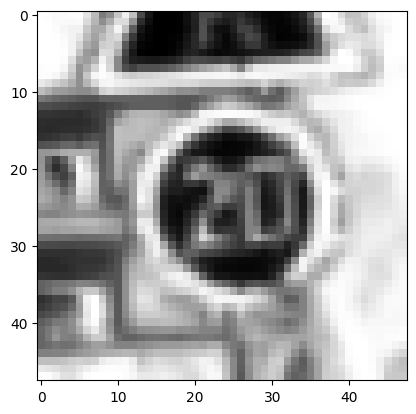

In [34]:
# Storing the images in visualize_img.
visualize_img = normalized_df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

## Outlier Mining

### DBSCAN

In [35]:
# Setting the value for epsilon parameter for DBSCAN.
eps = 11.0
# Setting the value for minimum sample parameter for DBSCAN.
min_samples = 80
# Intialsing the model for DBSCAN.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# Fitting the model to the data_array.
dbscan.fit(data_array)
# Labels all the outliers.
outlier_labels = dbscan.labels_

In [36]:
# Printing the total number of outliers.
num_outliers = np.sum(outlier_labels == -1)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 3680


In [37]:
# Finding all the places where the outliers lie.
outlier_indices = np.where(outlier_labels == -1)[0]
# Coverting it into a list
outlier_indices = outlier_indices.tolist()
# Printing the list of outliers.
# print("Outlier List : ",outlier_indices)

### Scatter Plot for Outlier Visualization

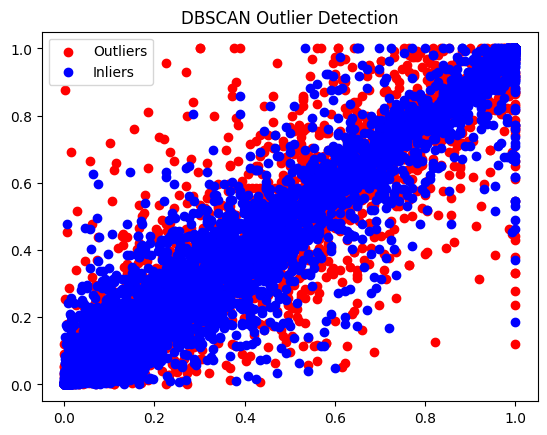

In [38]:
# Creating  a scatter plot to visualize the outliers in the dataset.
plt.scatter(data_array[outlier_labels == -1, 0], data_array[outlier_labels == -1, 1], c='red', label='Outliers')
# Here the red represents the outliers and blue represents inliers.
plt.scatter(data_array[outlier_labels != -1, 0], data_array[outlier_labels != -1, 1], c='blue', label='Inliers')
plt.legend()
# Lablelling the Plot.
plt.title('DBSCAN Outlier Detection')
plt.show()

In [39]:
# Removing all the outliers in the dataframe.
def removeOutliers(dataframe):
    dataframe.drop(dataframe.index[outlier_indices], axis=0, inplace=True)

In [40]:
# Calling the function to  remove the outliers.
removeOutliers(normalized_df)

In [41]:
# Removing the outliers in train_y_df.
removeOutliers(train_y_df)

In [42]:
# Checking the dimension of  train_y_df files after removing the outliers.
train_y_df.shape

(6010, 1)

In [43]:
normalized_df.shape

(6010, 2304)

# Class Data Distribution Visualisation

In [42]:
# X_df = pd.read_csv("x_train_all.csv")
# y_df = pd.read_csv("y_train_all.csv")

In [43]:
# def class_distribution(data):   
#     # Counting the occurrences of each class
#     class_counts = data.value_counts()

#     # Geting the class labels and their counts
#     labels = class_counts.index
#     counts = class_counts.values

#     # Creating a pie chart
#     plt.figure(figsize=(8, 8))

#     plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
#     plt.title('Class Distribution')

#     # Display the chart
#     plt.show()

In [44]:
# # Loading original (unmodified) CSV files
# dy = pd.read_csv('y_train_all.csv')  
# dx = pd.read_csv('x_train_all.csv') 

# class_ranges = {}
# current_class = dy.iloc[0, 0]  # Get first class label
# start_row = 0

# # Iterate through the y_train_all dataset to find row ranges for each class
# for i in range(1, len(dy)):
#     if dy.iloc[i, 0] != current_class:
#         end_row = i - 1
#         class_ranges[current_class] = (start_row, end_row)
#         current_class = dy.iloc[i, 0]
#         start_row = i

# # Adding the last class range
# end_row = len(dy) - 1
# class_ranges[current_class] = (start_row, end_row)

# # Printing the row ranges for each class in y_train_all dataset
# print("Row ranges for each class label in y_train:")
# for class_label, (start, end) in class_ranges.items():
#     print(f"Class {class_label}: Rows {start} to {end}")

# # applying same row ranges to x_train_all
# class_ranges_x_train = {}

# for class_label, (start, end) in class_ranges.items():
#     x_train_subset = dx.iloc[start:end+1]
#     class_ranges_x_train[class_label] = x_train_subset

# # Printing the row ranges for each class label in x_train
# print("\nRow ranges for each class label in x_train:")
# for class_label, x_train_subset in class_ranges_x_train.items():
#     print(f"Class {class_label}: Rows {x_train_subset.index[0]} to {x_train_subset.index[-1]}")

In [45]:
# # Loading the data
# # data = pd.read_csv('y_train_all.csv')
# class_distribution(dy)

## Over Sampling

In [46]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [48]:
# Loading CSV files
y = train_y_df.copy() 
X = normalized_df.copy()

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Counter({0: 1639, 1: 1639, 2: 1639, 3: 1639, 4: 1639, 5: 1639, 6: 1639, 7: 1639, 8: 1639, 9: 1639})
Class=0, n=1639 (10.000%)
Class=1, n=1639 (10.000%)
Class=2, n=1639 (10.000%)
Class=3, n=1639 (10.000%)
Class=4, n=1639 (10.000%)
Class=5, n=1639 (10.000%)
Class=6, n=1639 (10.000%)
Class=7, n=1639 (10.000%)
Class=8, n=1639 (10.000%)
Class=9, n=1639 (10.000%)


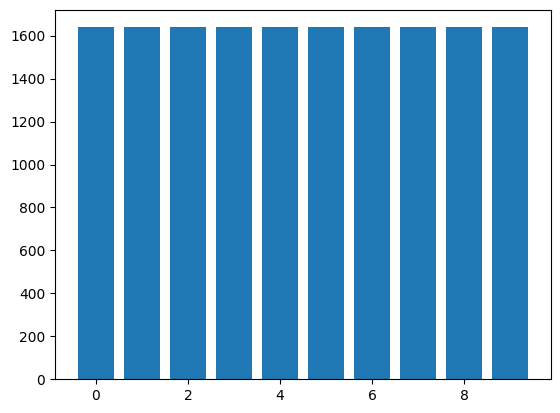

In [49]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y.values.ravel())
# summarize distribution
counter = Counter(y)
print(counter)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [50]:
# train_y_df = pd.DataFrame(y)
# normalized_df = pd.DataFrame(X)

In [51]:
# class_distribution(train_y_df)

<!-- # Data Visualisation -->

### Cross Validation

In [52]:
#importing library for cross validation
from sklearn.model_selection import cross_val_score

In [53]:
#K-fold cross validation

# model = decision tree classifier model
# X_train = training dataset
# y_train = target column of training dataset
# k = number of folds

def cross_validation(model, X_train, y_train, k):
#   model.fit(X_train, y_train)
  # Applying 10-Fold Cross Validation
  scores = cross_val_score(model, X_train, y_train, cv = k, scoring='accuracy')
  #print("Model {gnb} - X_train: {X_train}   y_train: {y_train}")
  print('Average cross-validation score: {:.4f}'.format(scores.mean()))

## Evaluation Metrics

In [54]:
#importing library for generating metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [55]:
def evaluationMetrics(model, X_train, y_train, X_test, y_test, y_pred):
    #check if model is overfitting or underfitting
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print()

    #checking Accuracy, Precision, Recall Score and Mean Absolute Error
    print('Model Accuracy Score : {:.4f}'.format(accuracy_score(y_test,y_pred)))
    print("Precision Score : {:.4f}".format(precision_score(y_test, y_pred, average='micro')))
    print("Recall Score : {:.4f}".format(recall_score(y_test, y_pred, average='micro')))
    print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(y_test,y_pred)))
    print("F1 Score : {:.4f}".format(f1_score(y_test, y_pred, average='micro')))
    print()
    print()
    
    confusionMatrix = confusion_matrix(y_test, y_pred)
    
    #Visualizing a confusion matrix (using a heat map)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the Confusion Matrix and slice it into four pieces
    FP = confusionMatrix.sum(axis=0) - np.diag(confusionMatrix)
    FN = confusionMatrix.sum(axis=1) - np.diag(confusionMatrix)
    TP = np.diag(confusionMatrix)
    TN = confusionMatrix.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    print(f"Sensitivity (true positive rate), for each class: {TPR}")
    print()
    print(f"Sensitivity (Avg): {np.mean(TPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"Specificity (true negative rate), for each class: {TNR}")
    print()
    print(f"Specificity (Avg): {np.mean(TNR)}")
    print()
    print("------------------------------------------------------------")
    print(f"FP rate, for each class: {FPR}")
    print()
    print(f"FP rate (Avg): {np.mean(FPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"FN rate, for each class: {FNR}")
    print()
    print(f"FN rate (Avg): {np.mean(FNR)}")
    print()
    print("------------------------------------------------------------")
    print(f"TP rate, for each class: {TPR}")
    print()
    print(f"TP rate (Avg): {np.mean(TPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"TN rate, for each class: {TNR}")
    print()
    print(f"TN rate (Avg): {np.mean(TNR)}")

# Linear Classifier Analysis

## SVM Classifier

In [56]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [57]:
def svm_function(X_dataset,y_dataset):


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_dataset,y_dataset, test_size=0.3, random_state=42)


    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', C=0.5)

    # Run SVM without cross-validation
    svm_classifier.fit(X_train, y_train)
    predictions_no_cv = svm_classifier.predict(X_test)
    accuracy_no_cv = accuracy_score(y_test, predictions_no_cv)
    print(f"Accuracy without Cross-Validation: {accuracy_no_cv}")

    cross_validation(svm_classifier, X_train, y_train, k)

    print("Accuracy on the test set")
    evaluationMetrics(svm_classifier, X_train, y_train, X_test, y_test, predictions_no_cv)
    
    

Running svm classifier on dataset that has not been oversampled


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without Cross-Validation: 0.9622850804215197


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average cross-validation score: 0.9572
Accuracy on the test set
Training set score: 1.0000
Test set score: 0.9623

Model Accuracy Score : 0.9623
Precision Score : 0.9623
Recall Score : 0.9623
Mean Absolute Error : 0.0588
F1 Score : 0.9623




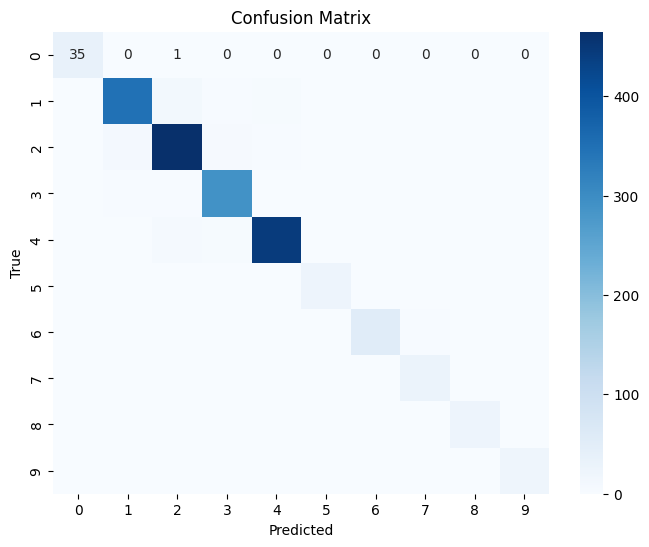

Sensitivity (true positive rate), for each class: [0.97222222 0.9532967  0.95876289 0.98305085 0.96949891 0.96153846
 0.93103448 0.93333333 0.92592593 0.91304348]

Sensitivity (Avg): 0.9501707252067083

------------------------------------------------------------
Specificity (true negative rate), for each class: [1.         0.99096595 0.98103187 0.99005305 0.99479167 1.
 0.99885387 0.99830795 0.99831081 1.        ]

Specificity (Avg): 0.995231516373261

------------------------------------------------------------
FP rate, for each class: [0.         0.00903405 0.01896813 0.00994695 0.00520833 0.
 0.00114613 0.00169205 0.00168919 0.        ]

FP rate (Avg): 0.00476848362673892

------------------------------------------------------------
FN rate, for each class: [0.02777778 0.0467033  0.04123711 0.01694915 0.03050109 0.03846154
 0.06896552 0.06666667 0.07407407 0.08695652]

FN rate (Avg): 0.04982927479329169

------------------------------------------------------------
TP rate, for each

In [58]:
# Running svm classifier on dataset that has not been oversampled
print("Running svm classifier on dataset that has not been oversampled")
svm_function(normalized_df,train_y_df)

Accuracy without Cross-Validation: 0.990644702054098
Average cross-validation score: 0.9896
Accuracy on the test set
Training set score: 1.0000
Test set score: 0.9906

Model Accuracy Score : 0.9906
Precision Score : 0.9906
Recall Score : 0.9906
Mean Absolute Error : 0.0157
F1 Score : 0.9906




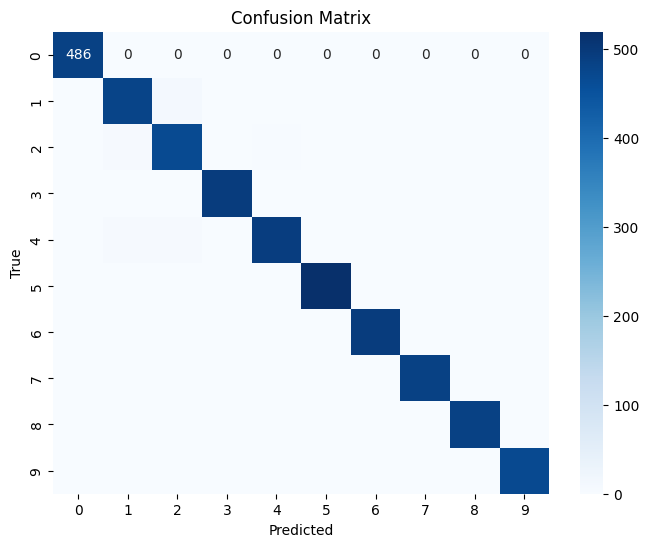

Sensitivity (true positive rate), for each class: [1.         0.97357724 0.97297297 0.9959596  0.96470588 1.
 1.         1.         1.         1.        ]

Sensitivity (Avg): 0.9907215687057868

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99954863 0.99661017 0.99549143 0.99886929 0.99909235 1.
 1.         1.         1.         1.        ]

Specificity (Avg): 0.9989611880824046

------------------------------------------------------------
FP rate, for each class: [0.00045137 0.00338983 0.00450857 0.00113071 0.00090765 0.
 0.         0.         0.         0.        ]

FP rate (Avg): 0.0010388119175954173

------------------------------------------------------------
FN rate, for each class: [0.         0.02642276 0.02702703 0.0040404  0.03529412 0.
 0.         0.         0.         0.        ]

FN rate (Avg): 0.009278431294213216

------------------------------------------------------------
TP rate, for each class: [1. 

In [59]:
## Running SVM classifier on data that has been oversampled
svm_function(X,y)

# Multi Layer Perceptron (MLP)

In [44]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [45]:
X_test_df = normalized_df_test.copy()
y_test_df = test_y_df.copy()

## Hyperparameter v/s Model Accuracy

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [47]:
# Split the training data into training/testing sets in an 80:20 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(normalized_df, train_y_df, test_size=0.2, random_state=42)

In [52]:
y1_train.shape

(4808, 1)

In [53]:
y1_test.shape

(1202, 1)

### Activation function

In [48]:
# Iterate through parameter values
parameters = ['logistic', 'tanh', 'relu']
print("Accuracies of the model based on the Activation functions: ")
      
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(activation = param)
    #train the model
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    #calculate the accuracy of model
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))


Accuracies of the model based on the Activation functions: 
96.76% - logistic
96.41999999999999% - tanh
95.67% - relu


### Number of hidden layers and size of hidden layers 

Comparing the model accuracies with different number of nodes in layers

In [49]:
print("Accuracies of the model based on the Number of Nodes in each layer: ")
parameters= [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,)]
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(hidden_layer_sizes= param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Number of Nodes in each layer: 
25.619999999999997% - (1,)
25.619999999999997% - (2,)
25.619999999999997% - (3,)
77.62% - (4,)
79.36999999999999% - (5,)
86.02% - (6,)
80.03% - (7,)
90.27% - (8,)
84.86% - (9,)
80.2% - (10,)
88.69% - (11,)
93.51% - (12,)
84.53% - (13,)
87.77000000000001% - (14,)
93.01% - (15,)


Comparing the model accuracies with different number of layers

In [50]:
print("Accuracies of the model based on the Number of Layers (4 nodes): ")
parameters= [(4,), (4,4), (4,4,4), (4,4,4,4)]
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(hidden_layer_sizes= param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Number of Layers (4 nodes): 
81.2% - (4,)
25.619999999999997% - (4, 4)
55.32% - (4, 4, 4)
25.619999999999997% - (4, 4, 4, 4)


### Learning Rate

In [51]:
print("Accuracies of the model based on the Number of Layers (10 nodes): ")
parameters= [(10,), (10,10), (10,10,10)]
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(hidden_layer_sizes= param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Number of Layers (10 nodes): 
86.02% - (10,)
81.61% - (10, 10)
90.68% - (10, 10, 10)


### Momentum

In [59]:
print("Accuracies of the model based on the Momentum: ")
parameters=[0.2, 0.5, 0.9] ##only when solver is sgd 
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(solver= 'sgd', momentum = param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Momentum: 
81.11% - 0.2
86.44% - 0.5
95.34% - 0.9


### Validation Threshold

In [58]:
print("Accuracies of the model based on the Validation Threshold: ")
parameters=  [0.1, 0.3, 0.5]
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(early_stopping= True, validation_fraction = param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Validation Threshold: 
95.17% - 0.1
93.34% - 0.3
90.77% - 0.5


### Epochs

In [57]:
print("Accuracies of the model based on the Epochs: ")
parameters= [50, 100, 200, 300]
for param in parameters:
    # Initialize the model with the current parameter
    mlp = MLPClassifier(max_iter= param)
    mlp.fit(X1_train, y1_train)
    y_pred = mlp.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print("{}% - {}".format(round(accuracy,4)*100, param))

Accuracies of the model based on the Epochs: 
92.67999999999999% - 50
95.50999999999999% - 100
95.84% - 200
96.00999999999999% - 300


## Hyperparameter combinations with Train Test Split (80:20)

In [45]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=100)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 85.94000000000001%


In [46]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=300)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 90.93%


In [49]:
mlp = MLPClassifier(
    activation = 'logistic',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=100)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 47.5%


In [50]:
mlp = MLPClassifier(
    activation = 'logistic',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    max_iter=100)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 49.33%


In [51]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    max_iter=300)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 93.93%


In [52]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 95.00999999999999%


In [67]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,10),
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 91.18%


In [53]:
mlp = MLPClassifier(
    activation = 'tanh',
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 97.0%


In [54]:
mlp = MLPClassifier(
    activation = 'tanh',
    learning_rate = 'constant')

mlp.fit(X1_train, y1_train)
y_pred = mlp.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 94.01%


## Hyperparameter combinations with Training and Test Data

In [51]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=100)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 76.75999999999999%


In [58]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=300)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 81.0%


In [52]:
mlp = MLPClassifier(
    activation = 'logistic',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    early_stopping= True, 
    validation_fraction = 0.1,
    max_iter=100)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 28.249999999999996%


In [59]:
mlp = MLPClassifier(
    activation = 'logistic',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    max_iter=100)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 44.82%


In [53]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    solver= 'sgd', 
    momentum = 0.9,
    max_iter=300)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 82.85%


In [56]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 82.62%


In [55]:
mlp = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (10,10),
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 77.99000000000001%


In [54]:
mlp = MLPClassifier(
    activation = 'tanh',
    learning_rate = 'constant',
    max_iter=300)

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 81.84%


In [57]:
mlp = MLPClassifier(
    activation = 'tanh',
    learning_rate = 'constant')

mlp.fit(normalized_df, train_y_df)
y_pred = mlp.predict(X_test_df)
accuracy = accuracy_score(y_test_df, y_pred)
print("Model Accuracy - {}%".format(round(accuracy,4)*100))

Model Accuracy - 81.04%


## SYSTEMATIC WAY OF HYPERPARAMETER TUNING

In [55]:
def print_result(result):
    print("BEST PARAMS: {} \n".format(result.best_params_))
    means = result.cv_results_['mean_test_score']
    params = result.cv_results_['params']
    print("Mean Accuracies of hyperparameter combinations:")
    for mean, param in zip(means, params):
        print('{}%  for {}'.format(round(mean,4)*100, param))
        print()

### GRID SEARCH

In [56]:
mlp = MLPClassifier()
parameters = {
    'activation' : ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes' : [(10,), (10, 10), (10, 10, 10)],
    'solver' : ['adam', 'sgd'],
    'early_stopping' : [False, True],
    'learning_rate' : ['constant', 'adaptive'],
    'validation_fraction' : [0.1, 0.3], 
    'max_iter': [50, 100],   
}


cv = GridSearchCV(mlp, parameters, scoring='accuracy', cv=5)


cv.fit(normalized_df, train_y_df.values.ravel())
print_result(cv)

BEST PARAMS: {'activation': 'tanh', 'early_stopping': False, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam', 'validation_fraction': 0.3} 

Mean Accuracies of hyperparameter combinations:
71.48%  for {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam', 'validation_fraction': 0.1}

71.98%  for {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam', 'validation_fraction': 0.3}

39.75%  for {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd', 'validation_fraction': 0.1}

40.75%  for {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd', 'validation_fraction': 0.3}

80.65%  for {'activation': 'lo

### RANDOM SEARCH

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}


random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(normalized_df, train_y_df.values.ravel())
best_params = random_search.best_params_
print_result(random_search)

BEST PARAMS: {'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'tanh'} 

Mean Accuracies of hyperparameter combinations:
84.68%  for {'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}

86.64%  for {'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'tanh'}

85.11%  for {'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}

85.27%  for {'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.001, 'activation': 'relu'}

86.17%  for {'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}

85.76%  for {'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}

85.39%  for {'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'}

85.11%  for {'learning_rate': 'constant', 'hidden_laye

# Implementation of CNN

## CNN without layers

In [110]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
import numpy as np

def cnn_regression(X_cnn_df, y_cnn_df, cv=False):
    # Reshape input data for CNN (assuming X_cnn_df is 2D)
    X_cnn_df_reshaped = X_cnn_df.values.reshape(X_cnn_df.shape[0], X_cnn_df.shape[1], 1)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cnn_df_reshaped, y_cnn_df, test_size=0.2, random_state=42)

    # Create a simple CNN model for 1D data
    input_shape = (X_cnn_df_reshaped.shape[1], 1)
    model = create_model(input_shape)

    # Without cross-validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    cnn_predictions = model.predict(X_test)

    # Evaluate performance without cross-validation
    mse_without_cv = mean_squared_error(y_test, cnn_predictions)
    r2_without_cv = r2_score(y_test, cnn_predictions)
    print("Performance without cross-validation:")
    print("MSE:", mse_without_cv)
    print("R-squared:", r2_without_cv)

    if cv:
        # Perform Time Series Cross-Validation
        tscv = TimeSeriesSplit(n_splits=10)
        cv_mse_scores = []
        cv_r2_scores = []

        for train_index, test_index in tscv.split(X_cnn_df_reshaped):
            X_train_fold, X_test_fold = X_cnn_df_reshaped[train_index], X_cnn_df_reshaped[test_index]

            # Handle y_cnn_df based on its type (DataFrame or NumPy array)
            if isinstance(y_cnn_df, pd.DataFrame):
                y_train_fold, y_test_fold = y_cnn_df.iloc[train_index], y_cnn_df.iloc[test_index]
            else:
                y_train_fold, y_test_fold = y_cnn_df[train_index], y_cnn_df[test_index]

            model = create_model(input_shape)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

            predictions_fold = model.predict(X_test_fold)
            mse_fold = mean_squared_error(y_test_fold, predictions_fold)
            r2_fold = r2_score(y_test_fold, predictions_fold)

            cv_mse_scores.append(mse_fold)
            cv_r2_scores.append(r2_fold)

        print("\nPerformance with Time Series Cross-Validation:")
        print("Average MSE:", np.mean(cv_mse_scores))
        print("Average R-squared:", np.mean(cv_r2_scores))

# normalized_df and train_y_df are input features and target values
print("CNN regression for dataset that has not been oversampled")
cnn_regression(normalized_df, train_y_df, cv=True)

# X and y are oversampled input features and target values
print("CNN regression for dataset that has been oversampled")
cnn_regression(X, y, cv=True)



CNN regression for dataset that has not been oversampled
Epoch 1/10
151/151 [==============================] - 6s 30ms/step - loss: 1.9535 - mse: 1.9535
Epoch 2/10
151/151 [==============================] - 5s 36ms/step - loss: 0.8540 - mse: 0.8540
Epoch 3/10
151/151 [==============================] - 5s 31ms/step - loss: 0.5776 - mse: 0.5776
Epoch 4/10
151/151 [==============================] - 5s 32ms/step - loss: 0.4895 - mse: 0.4895
Epoch 5/10
151/151 [==============================] - 5s 32ms/step - loss: 0.4279 - mse: 0.4279
Epoch 6/10
151/151 [==============================] - 5s 31ms/step - loss: 0.3688 - mse: 0.3688
Epoch 7/10
151/151 [==============================] - 5s 31ms/step - loss: 0.3229 - mse: 0.3229
Epoch 8/10
151/151 [==============================] - 5s 34ms/step - loss: 0.2902 - mse: 0.2902
Epoch 9/10
151/151 [==============================] - 6s 38ms/step - loss: 0.2714 - mse: 0.2714
Epoch 10/10
38/38 [==============================] - 1s 15ms/step
Performance w

In [111]:
# X and y are oversampled input features and target values
print("CNN regression for dataset that has been oversampled")
cnn_regression(normalized_df, train_y_df, cv=True)

CNN regression for dataset that has been oversampled
Epoch 1/10
151/151 [==============================] - 8s 35ms/step - loss: 1.9077 - mse: 1.9077
Epoch 2/10
151/151 [==============================] - 4s 28ms/step - loss: 0.8365 - mse: 0.8365
Epoch 3/10
151/151 [==============================] - 5s 34ms/step - loss: 0.6741 - mse: 0.6741
Epoch 4/10
151/151 [==============================] - 5s 30ms/step - loss: 0.5589 - mse: 0.5589
Epoch 5/10
151/151 [==============================] - 5s 34ms/step - loss: 0.4694 - mse: 0.4694
Epoch 6/10
151/151 [==============================] - 5s 33ms/step - loss: 0.4449 - mse: 0.4449
Epoch 7/10
151/151 [==============================] - 5s 33ms/step - loss: 0.3929 - mse: 0.3929
Epoch 8/10
151/151 [==============================] - 6s 38ms/step - loss: 0.3998 - mse: 0.3998
Epoch 9/10
151/151 [==============================] - 6s 39ms/step - loss: 0.3466 - mse: 0.3466
Epoch 10/10
38/38 [==============================] - 1s 13ms/step
Performance witho

## CNN with layers

In [114]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

def create_model(input_shape):
    model = Sequential()
    #model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    #model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output layer with 1 neuron for regression task
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

def cnn_regression(X_cnn_df, y_cnn_df, cv=False):
    # Reshape input data for CNN 
    X_cnn_df_reshaped = X_cnn_df.values.reshape(X_cnn_df.shape[0], X_cnn_df.shape[1], 1)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cnn_df_reshaped, y_cnn_df, test_size=0.2, random_state=42)

    # Create a CNN model for 1D data with varied layers
    input_shape = (X_cnn_df_reshaped.shape[1], 1)
    model = create_model(input_shape)

    # Without cross-validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    cnn_predictions = model.predict(X_test)

    # Evaluate performance without cross-validation
    mse_without_cv = mean_squared_error(y_test, cnn_predictions)
    r2_without_cv = r2_score(y_test, cnn_predictions)
    print("Performance without cross-validation:")
    print("MSE:", mse_without_cv)
    print("R-squared:", r2_without_cv)

    if cv:
        # Perform Time Series Cross-Validation
        tscv = TimeSeriesSplit(n_splits=10)
        cv_mse_scores = []
        cv_r2_scores = []

        for train_index, test_index in tscv.split(X_cnn_df_reshaped):
            X_train_fold, X_test_fold = X_cnn_df_reshaped[train_index], X_cnn_df_reshaped[test_index]

            # Handle y_cnn_df based on its type (DataFrame or NumPy array)
            if isinstance(y_cnn_df, pd.DataFrame):
                y_train_fold, y_test_fold = y_cnn_df.iloc[train_index], y_cnn_df.iloc[test_index]
            else:
                y_train_fold, y_test_fold = y_cnn_df[train_index], y_cnn_df[test_index]

            model = create_model(input_shape)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

            predictions_fold = model.predict(X_test_fold)
            mse_fold = mean_squared_error(y_test_fold, predictions_fold)
            r2_fold = r2_score(y_test_fold, predictions_fold)

            cv_mse_scores.append(mse_fold)
            cv_r2_scores.append(r2_fold)

        print("\nPerformance with Time Series Cross-Validation:")
        print("Average MSE:", np.mean(cv_mse_scores))
        print("Average R-squared:", np.mean(cv_r2_scores))


In [115]:
# normalized_df and train_y_df are input features and target values
print("CNN regression for dataset that has not been oversampled")
cnn_regression(normalized_df, train_y_df, cv=True)

CNN regression for dataset that has not been oversampled
Epoch 1/10
151/151 [==============================] - 8s 28ms/step - loss: 1.9049 - mse: 1.9049
Epoch 2/10
151/151 [==============================] - 4s 25ms/step - loss: 0.8560 - mse: 0.8560
Epoch 3/10
151/151 [==============================] - 3s 19ms/step - loss: 0.6326 - mse: 0.6326
Epoch 4/10
151/151 [==============================] - 3s 21ms/step - loss: 0.5260 - mse: 0.5260
Epoch 5/10
151/151 [==============================] - 3s 21ms/step - loss: 0.5001 - mse: 0.5001
Epoch 6/10
151/151 [==============================] - 3s 19ms/step - loss: 0.4596 - mse: 0.4596
Epoch 7/10
151/151 [==============================] - 3s 18ms/step - loss: 0.4412 - mse: 0.4412
Epoch 8/10
151/151 [==============================] - 3s 17ms/step - loss: 0.4025 - mse: 0.4025
Epoch 9/10
151/151 [==============================] - 3s 23ms/step - loss: 0.3853 - mse: 0.3853
Epoch 10/10
38/38 [==============================] - 1s 13ms/step
Performance w

In [116]:
# X and y are oversampled input features and target values
print("CNN regression for dataset that has been oversampled")
cnn_regression(X, y, cv=True)

CNN regression for dataset that has been oversampled
Epoch 1/10
410/410 [==============================] - 13s 27ms/step - loss: 1.7158 - mse: 1.7158
Epoch 2/10
410/410 [==============================] - 9s 21ms/step - loss: 0.4370 - mse: 0.4370
Epoch 3/10
410/410 [==============================] - 9s 22ms/step - loss: 0.3427 - mse: 0.3427
Epoch 4/10
410/410 [==============================] - 11s 26ms/step - loss: 0.2877 - mse: 0.2877
Epoch 5/10
410/410 [==============================] - 13s 31ms/step - loss: 0.2624 - mse: 0.2624
Epoch 6/10
410/410 [==============================] - 11s 26ms/step - loss: 0.2407 - mse: 0.2407
Epoch 7/10
410/410 [==============================] - 11s 26ms/step - loss: 0.2047 - mse: 0.2047
Epoch 8/10
410/410 [==============================] - 13s 31ms/step - loss: 0.1919 - mse: 0.1919
Epoch 9/10
410/410 [==============================] - 11s 26ms/step - loss: 0.1806 - mse: 0.1806
Epoch 10/10
103/103 [==============================] - 5s 9ms/step
Performan

## epochs - 8, activation function - sigmoid

In [120]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
 
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    # model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    # model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(1))  # Output layer with 1 neuron for regression task
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model
 
def cnn_regression(X_cnn_df, y_cnn_df, cv=False):
    # Reshape input data for CNN (assuming X_cnn_df is 2D)
    X_cnn_df_reshaped = X_cnn_df.values.reshape(X_cnn_df.shape[0], X_cnn_df.shape[1], 1)
 
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_cnn_df_reshaped, y_cnn_df, test_size=0.2, random_state=42)
 
    # Create a CNN model for 1D data with varied layers
    input_shape = (X_cnn_df_reshaped.shape[1], 1)
    model = create_model(input_shape)
 
    # Without cross-validation
    model.fit(X_train, y_train, epochs=8, batch_size=32, verbose=2)
    cnn_predictions = model.predict(X_test)
 
    # Evaluate performance without cross-validation
    mse_without_cv = mean_squared_error(y_test, cnn_predictions)
    r2_without_cv = r2_score(y_test, cnn_predictions)
    print("Performance without cross-validation:")
    print("MSE:", mse_without_cv)
    print("R-squared:", r2_without_cv)
 
    if cv:
        # Perform Time Series Cross-Validation
        tscv = TimeSeriesSplit(n_splits=10)
        cv_mse_scores = []
        cv_r2_scores = []
 
        for train_index, test_index in tscv.split(X_cnn_df_reshaped):
            X_train_fold, X_test_fold = X_cnn_df_reshaped[train_index], X_cnn_df_reshaped[test_index]
 
            # Handle y_cnn_df based on its type (DataFrame or NumPy array)
            if isinstance(y_cnn_df, pd.DataFrame):
                y_train_fold, y_test_fold = y_cnn_df.iloc[train_index], y_cnn_df.iloc[test_index]
            else:
                y_train_fold, y_test_fold = y_cnn_df[train_index], y_cnn_df[test_index]
 
            model = create_model(input_shape)
            model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
 
            predictions_fold = model.predict(X_test_fold)
            mse_fold = mean_squared_error(y_test_fold, predictions_fold)
            r2_fold = r2_score(y_test_fold, predictions_fold)
 
            cv_mse_scores.append(mse_fold)
            cv_r2_scores.append(r2_fold)
 
        print("\nPerformance with Time Series Cross-Validation:")
        print("Average MSE:", np.mean(cv_mse_scores))
        print("Average R-squared:", np.mean(cv_r2_scores))

In [121]:
# normalized_df and train_y_df are input features and target values
print("CNN regression for dataset that has not been oversampled")
cnn_regression(normalized_df, train_y_df, cv=True)

CNN regression for dataset that has not been oversampled
Epoch 1/8
151/151 - 13s - loss: 35.9661 - mse: 35.9661 - 13s/epoch - 85ms/step
Epoch 2/8
151/151 - 12s - loss: 3.4276 - mse: 3.4276 - 12s/epoch - 79ms/step
Epoch 3/8
151/151 - 12s - loss: 3.2709 - mse: 3.2709 - 12s/epoch - 81ms/step
Epoch 4/8
151/151 - 15s - loss: 3.5890 - mse: 3.5890 - 15s/epoch - 97ms/step
Epoch 5/8
151/151 - 11s - loss: 3.7098 - mse: 3.7098 - 11s/epoch - 74ms/step
Epoch 6/8
151/151 - 12s - loss: 4.5727 - mse: 4.5727 - 12s/epoch - 78ms/step
Epoch 7/8
151/151 - 13s - loss: 3.4832 - mse: 3.4832 - 13s/epoch - 83ms/step
Epoch 8/8
151/151 - 11s - loss: 3.4253 - mse: 3.4253 - 11s/epoch - 73ms/step
38/38 [==============================] - 1s 23ms/step
Performance without cross-validation:
MSE: 6.846356484361218
R-squared: -1.2736017624108547
18/18 [==============================] - 1s 37ms/step

Performance with Time Series Cross-Validation:
Average MSE: 3.673682060927235
Average R-squared: -19.419989905793337


In [122]:
# X and y are oversampled input features and target values
print("CNN regression for dataset that has been oversampled")
cnn_regression(X, y, cv=True)

CNN regression for dataset that has been oversampled
Epoch 1/8
410/410 - 32s - loss: 18.3912 - mse: 18.3912 - 32s/epoch - 79ms/step
Epoch 2/8
410/410 - 30s - loss: 5.5512 - mse: 5.5512 - 30s/epoch - 74ms/step
Epoch 3/8
410/410 - 26s - loss: 3.2125 - mse: 3.2125 - 26s/epoch - 63ms/step
Epoch 4/8
410/410 - 24s - loss: 2.8035 - mse: 2.8035 - 24s/epoch - 58ms/step
Epoch 5/8
410/410 - 38s - loss: 2.5008 - mse: 2.5008 - 38s/epoch - 93ms/step
Epoch 6/8
410/410 - 27s - loss: 1.8468 - mse: 1.8468 - 27s/epoch - 66ms/step
Epoch 7/8
410/410 - 27s - loss: 1.9072 - mse: 1.9072 - 27s/epoch - 65ms/step
Epoch 8/8
410/410 - 26s - loss: 1.8922 - mse: 1.8922 - 26s/epoch - 63ms/step
103/103 [==============================] - 4s 39ms/step
Performance without cross-validation:
MSE: 1.261530438227429
R-squared: 0.8439695964206839
47/47 [==============================] - 3s 49ms/step

Performance with Time Series Cross-Validation:
Average MSE: 7.06999164655619
Average R-squared: -64.3422322571104
